# 1. Estudio de los datos

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('drinking_water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# Comprobamos la cantidad de valores únicos en las columanas
for column in df.columns:
    print("{} \t\t {} valores únicos".format(column, len( df[column].unique() ) ))

ph 		 2786 valores únicos
Hardness 		 3276 valores únicos
Solids 		 3276 valores únicos
Chloramines 		 3276 valores únicos
Sulfate 		 2496 valores únicos
Conductivity 		 3276 valores únicos
Organic_carbon 		 3276 valores únicos
Trihalomethanes 		 3115 valores únicos
Turbidity 		 3276 valores únicos
Potability 		 2 valores únicos


In [7]:
# Comprobamos el porcentaje de valores nulos en cada columna
for column in df.columns:
    print("{} \t\t {:.1f}% valores nulos".format(column, (df[column].isnull().sum() / len(df)) * 100 ))



ph 		 15.0% valores nulos
Hardness 		 0.0% valores nulos
Solids 		 0.0% valores nulos
Chloramines 		 0.0% valores nulos
Sulfate 		 23.8% valores nulos
Conductivity 		 0.0% valores nulos
Organic_carbon 		 0.0% valores nulos
Trihalomethanes 		 4.9% valores nulos
Turbidity 		 0.0% valores nulos
Potability 		 0.0% valores nulos


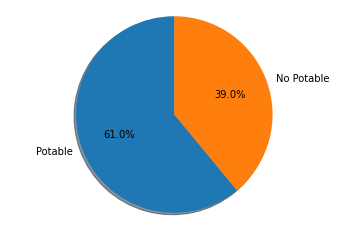

In [8]:
sizes = df['Potability'].value_counts().tolist()
labels = 'Potable', 'No Potable'

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0,0), labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)

ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

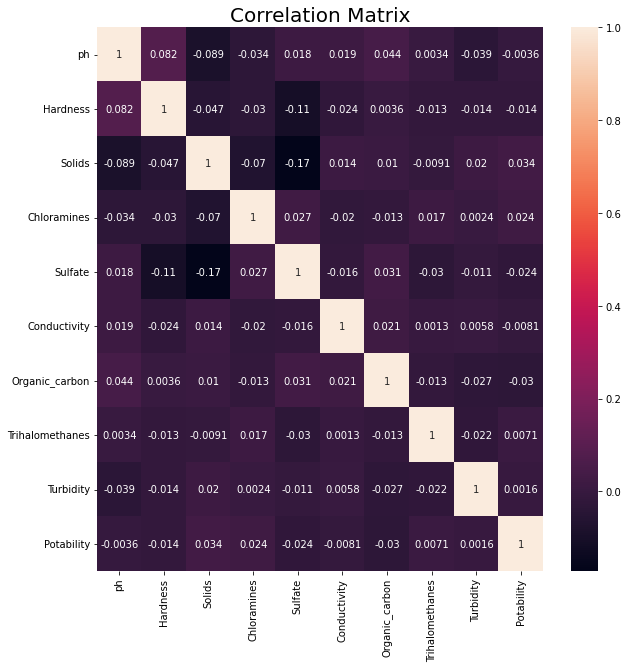

In [9]:
'''
' Matriz de correlacion
'
' Se puede observar que apenas existe correlacion entre los atributos,
' aunque la correlacion de Hardness y Solid con Sulfate es mayor que
' en el resto de atributos.
'''
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

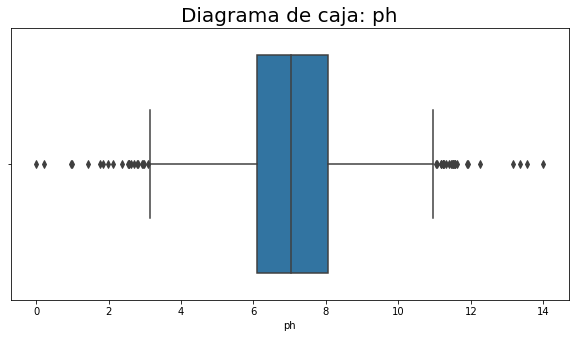

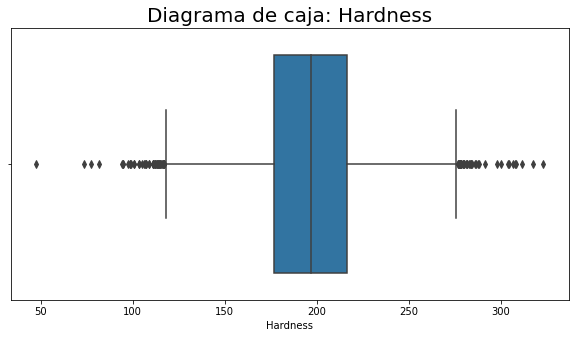

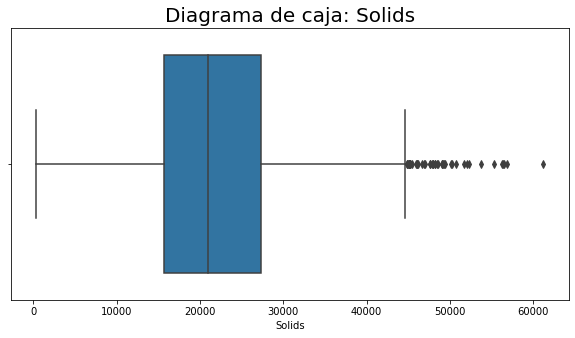

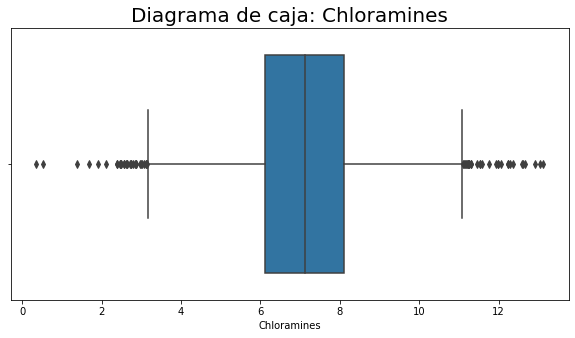

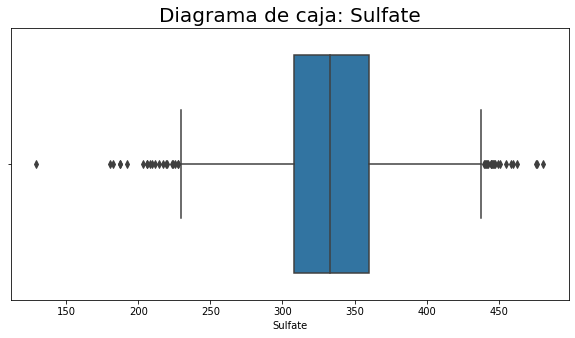

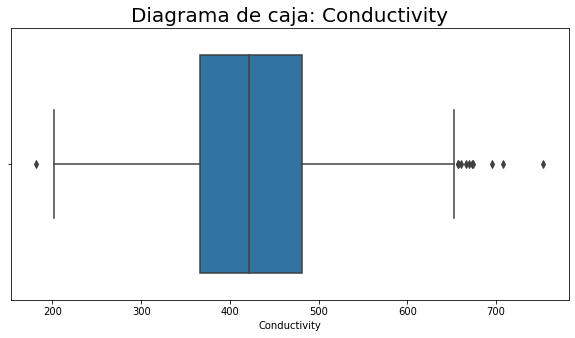

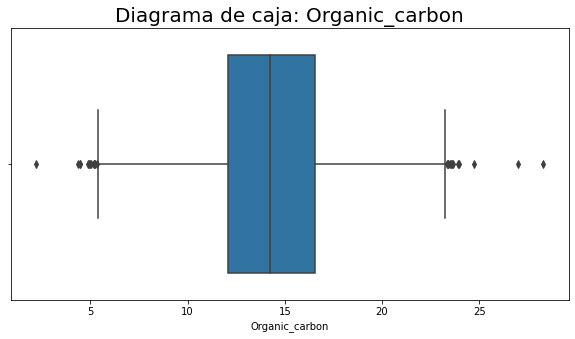

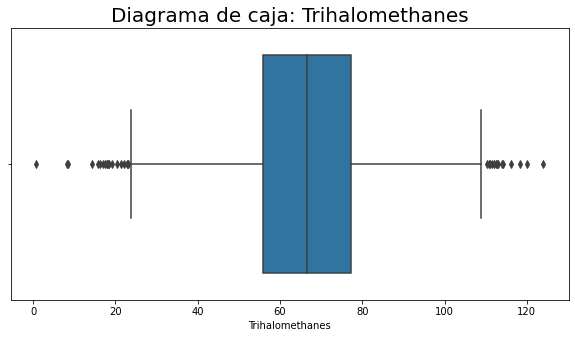

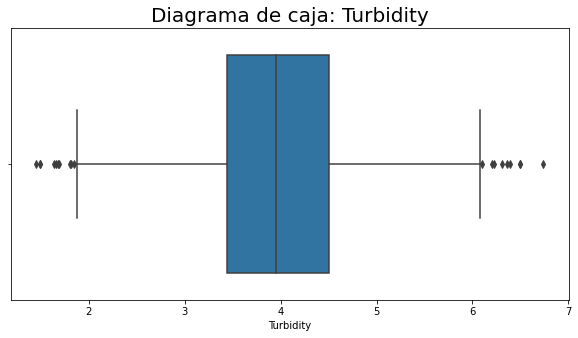

In [10]:
'''
' Diagrama de cajas
'
' En los siguientes diagramas podemos observar los valores
' atípico en los atributos. En todos los atributos pueden observarse
' que los valores atípicos se encuentran dentro del margen "normal"
' y no hay ninguno que puedan tratarse de un error.
'''
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Diagrama de caja: {}'.format(column), fontsize=20)



# 2. Preparacion para el modelo

In [11]:
'''
' Valores nulos
'
' Para resolver el problema de los valores nulos vamos a sustituir
' esos valores por la media del atributo. Con el objetivo de dar un 
' valor más "realista" la sustitución del valor nulo tendrá en cuenta
' en que clase se encuentra el dato y se sustituye por el valor medio
' de la clase.
'''

ph_mean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[ (df['Potability'] == 0) & (df['ph'].isna()), 'ph' ] = ph_mean_0

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[ (df['Potability'] == 1) & (df['ph'].isna()), 'ph' ] = ph_mean_1

sul_mean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[ (df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate' ] = sul_mean_0

sul_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[ (df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate' ] = sul_mean_1

tri_mean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[ (df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes' ] = tri_mean_0

tri_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[ (df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes' ] = tri_mean_1


In [12]:
for column in df.columns:
    print("{} \t\t {:.1f}% valores nulos".format(column, (df[column].isnull().sum() / len(df)) * 100 ))

ph 		 0.0% valores nulos
Hardness 		 0.0% valores nulos
Solids 		 0.0% valores nulos
Chloramines 		 0.0% valores nulos
Sulfate 		 0.0% valores nulos
Conductivity 		 0.0% valores nulos
Organic_carbon 		 0.0% valores nulos
Trihalomethanes 		 0.0% valores nulos
Turbidity 		 0.0% valores nulos
Potability 		 0.0% valores nulos


In [13]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=97)

In [15]:
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (2194, 9)
Test:  (1082, 9)


In [16]:
'''
' Estandarización de los datos
'
' Como los atributos tienen valores muy grandes aplicamos una
' estandarización para que se encuentren en el rango [-1, 1]
'''
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#3. Modelos

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


models_acc = []

kernel = 1.0 * RBF(1.0)

# Parametros por defecto de Sklearn
models = [SGDClassifier(max_iter=1000, tol=1e-3),
          KNeighborsClassifier(n_neighbors=3),
          GaussianProcessClassifier(kernel=kernel,
          random_state=0),
          GaussianNB(),
          DecisionTreeClassifier(random_state=0),
          AdaBoostClassifier(n_estimators=100, random_state=0),
          MLPClassifier(random_state=1, max_iter=300),
          LogisticRegression(random_state=0)]

models_names = ['SGDC', 'KNN', 'GaussianProcess', 'GaussianNB',
                'DecisionTree', 'AdaBoost', 'MLPC', 'LogisticRegression']

for model in models:

  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  models_acc.append(accuracy_score(y_test, pred))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
df_res = pd.DataFrame({
    'Accuracy': models_acc,
    'Name': models_names
})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


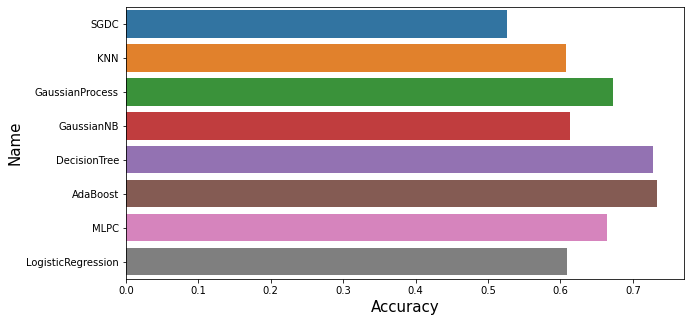

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(df_res['Accuracy'], df_res['Name'])
plt.xlabel('Accuracy', fontsize=15)
plt.ylabel('Name', fontsize=15);